In [1]:
from code.policy_gradients import run
from code.policy_gradients_baseline import run_with_baseline
from code.policy_gradients_actor_critic import run_actor_critic
import pickle
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term
tf_ver:2.10.0


In [4]:
number_of_experiments = 10
policy_results = []
for i in range(number_of_experiments):
    policy_results.append(run())

 25%|██▌       | 1272/5000 [07:42<22:36,  2.75it/s]


In [5]:
with open('policy_results.pkl', 'wb') as f:
    pickle.dump(policy_results, f)

In [ ]:
policy_baseline_results = []
for i in range(number_of_experiments):
    policy_baseline_results.append(run_with_baseline())

In [ ]:
with open('policy_baseline_results.pkl', 'wb') as f:
    pickle.dump(policy_baseline_results, f)

In [2]:
policy_actor_critic_results = []
for i in range(number_of_experiments):
    policy_actor_critic_results.append(run_actor_critic())

 37%|███▋      | 1832/5000 [05:15<23:03,  2.29it/s]

In [ ]:
with open('policy_actor_critic_results.pkl', 'wb') as f:
    pickle.dump(policy_actor_critic_results, f)

In [2]:
# load the results
with open('policy_results.pkl', 'rb') as f:
    policy_results = pickle.load(f)

with open('policy_baseline_results.pkl', 'rb') as f:
    policy_baseline_results = pickle.load(f)

with open('policy_actor_critic_results.pkl', 'rb') as f:
    policy_actor_critic_results = pickle.load(f)


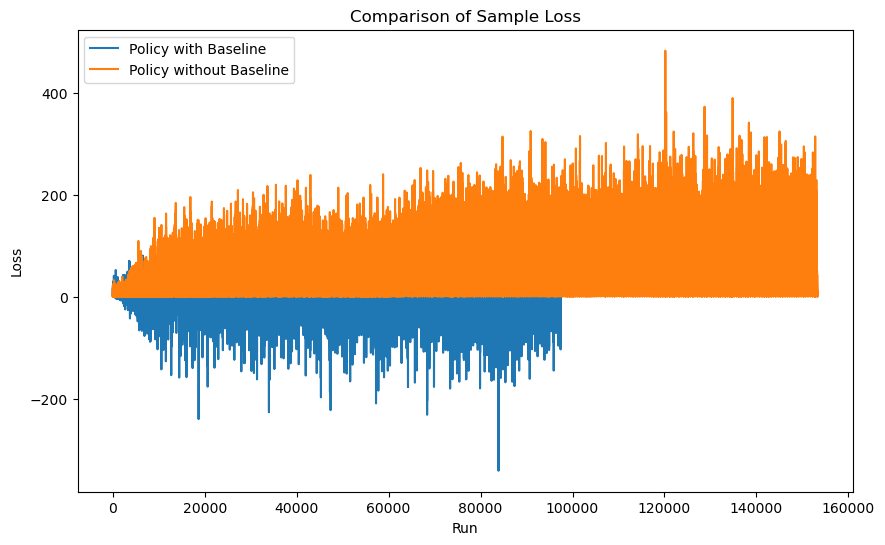

In [15]:
losses_baseline = policy_baseline_results[1]['loss']     
losses_policy = policy_results[1]['loss']

plt.figure(figsize=(10, 6))
plt.plot(losses_baseline, label='Policy with Baseline')
plt.plot(losses_policy, label='Policy without Baseline')
plt.xlabel('Run')
plt.ylabel('Loss')
plt.title(f'Comparison of Sample losses')
plt.legend()
plt.show()

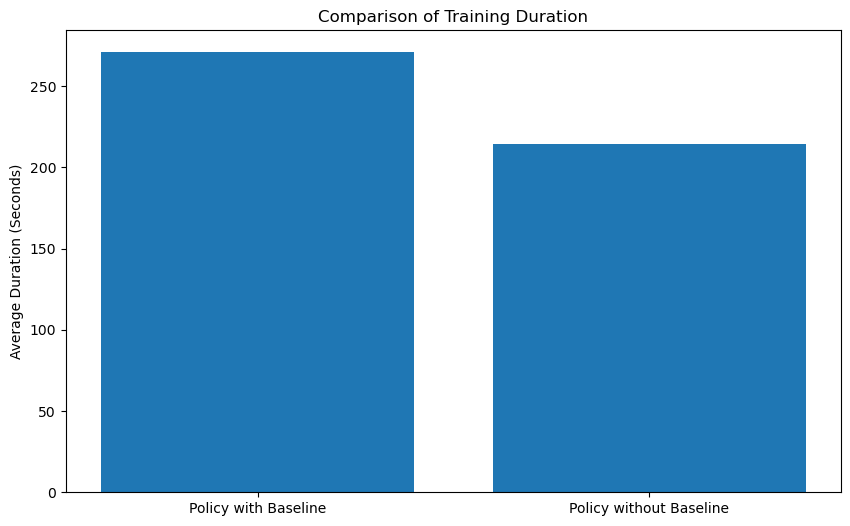

In [17]:
durations_baseline = [result['Duration'] for result in policy_baseline_results]
durations_policy = [result['Duration'] for result in policy_results]

plt.figure(figsize=(10, 6))
plt.bar(['Policy with Baseline', 'Policy without Baseline'], [np.mean(durations_baseline), np.mean(durations_policy)])
plt.ylabel('Average Duration (Seconds)')
plt.title('Comparison of Training Duration')
plt.show()

In [5]:
def average_duration(results_list):
    durations = [result['Duration'] for result in results_list]
    return np.mean(durations)

print("Average training duration (Policy with Baseline):", average_duration(policy_baseline_results))
print("Average training duration (Policy without Baseline):", average_duration(policy_results))


Average training duration (Policy with Baseline): 270.8574698448181
Average training duration (Policy without Baseline): 214.25177726745605


In [6]:
def average_solved_episode(results_list):
    solved_episodes = [result['Solved'] for result in results_list if result['Solved'] != -1]
    return np.mean(solved_episodes) if solved_episodes else None

print("Average solved episode (Policy with Baseline):", average_solved_episode(policy_baseline_results))
print("Average solved episode (Policy without Baseline):", average_solved_episode(policy_results))


Average solved episode (Policy with Baseline): 567.3
Average solved episode (Policy without Baseline): 881.8


In [7]:
def average_reward(results_list, last_n_episodes=100):
    all_rewards = np.concatenate([result['Reward'][-last_n_episodes:] for result in results_list])
    return np.mean(all_rewards)

print("Average reward over last 100 episodes (Policy with Baseline):", average_reward(policy_baseline_results))
print("Average reward over last 100 episodes (Policy without Baseline):", average_reward(policy_results))


Average reward over last 100 episodes (Policy with Baseline): 274.907
Average reward over last 100 episodes (Policy without Baseline): 283.992


In [8]:
def average_loss(results_list, loss_key='Loss'):
    all_losses = np.concatenate([result[loss_key] for result in results_list])
    return np.mean(all_losses)

print("Average policy loss (Policy with Baseline):", average_loss(policy_baseline_results))
print("Average policy loss (Policy without Baseline):", average_loss(policy_results))

# If using a baseline, also compute its loss
if 'LossV' in policy_baseline_results[0]:
    print("Average value loss (Policy with Baseline):", average_loss(policy_baseline_results, 'LossV'))


Average policy loss (Policy with Baseline): 0.5632921
Average policy loss (Policy without Baseline): 40.741302
Average value loss (Policy with Baseline): 521.1394


In [ ]:
losses_baseline = policy_baseline_results[1]['loss']     
losses_policy = policy_results[1]['loss']
losses_actor_critic = policy_actor_critic_results[1]['loss']

plt.figure(figsize=(10, 6))
plt.plot(losses_baseline, label='Policy with Baseline')
plt.plot(losses_policy, label='Policy without Baseline')
plt.plot(losses_actor_critic, label='Actor-Critic')
plt.xlabel('Run')
plt.ylabel('Loss')
plt.title(f'Comparison of Sample losses')
plt.legend()
plt.show()

In [ ]:
def calculate_statistics(results_list):
    solved_episodes = [result['Solved'] for result in results_list if result['Solved'] != -1]
    mean_solved = np.mean(solved_episodes)
    variance_solved = np.var(solved_episodes)
    return mean_solved, variance_solved

# Calculate statistics for each method
mean_solved_policy, var_solved_policy = calculate_statistics(policy_results)
mean_solved_policy_baseline, var_solved_policy_baseline = calculate_statistics(policy_baseline_results)
mean_solved_actor_critic, var_solved_actor_critic = calculate_statistics(policy_actor_critic_results)

In [ ]:
# Define labels, positions, mean values and error (variance)
labels = ['Policy', 'Policy with Baseline', 'Actor-Critic']
x_pos = np.arange(len(labels))
means = [mean_solved_policy, mean_solved_policy_baseline, mean_solved_actor_critic]
errors = [var_solved_policy, var_solved_policy_baseline, var_solved_actor_critic]

# Build the plot
plt.figure(figsize=(10, 8))
plt.bar(x_pos, means, yerr=errors, align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(x_pos, labels)
plt.xlabel('Methods')
plt.ylabel('Solved Episode')
plt.title('Average Solved Episode with Variance')
plt.tight_layout()

# Save the figure and show
plt.savefig('average_solved_variance.png')
plt.show()